# Phishing Website Detection 


## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted.

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'URL_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [10]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Loading the data
data = pd.read_csv('url_feature.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,southbankmosaics.com,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,uni-mainz.de,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1
2,voicefmradio.co.uk,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,sfnmjournal.com,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,rewildingargentina.org,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [12]:
#Checking the shape of the dataset
data0.shape

(11489, 17)

In [13]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [14]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11489 entries, 0 to 11488
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         11489 non-null  object
 1   Have_IP        11489 non-null  int64 
 2   Have_At        11489 non-null  int64 
 3   URL_Length     11489 non-null  int64 
 4   URL_Depth      11489 non-null  int64 
 5   Redirection    11489 non-null  int64 
 6   https_Domain   11489 non-null  int64 
 7   TinyURL        11489 non-null  int64 
 8   Prefix/Suffix  11489 non-null  int64 
 9   DNS_Record     11489 non-null  int64 
 10  Domain_Age     11489 non-null  int64 
 11  Domain_End     11489 non-null  int64 
 12  iFrame         11489 non-null  int64 
 13  Mouse_Over     11489 non-null  int64 
 14  Right_Click    11489 non-null  int64 
 15  Web_Forwards   11489 non-null  int64 
 16  Label          11489 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 1.5+ MB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

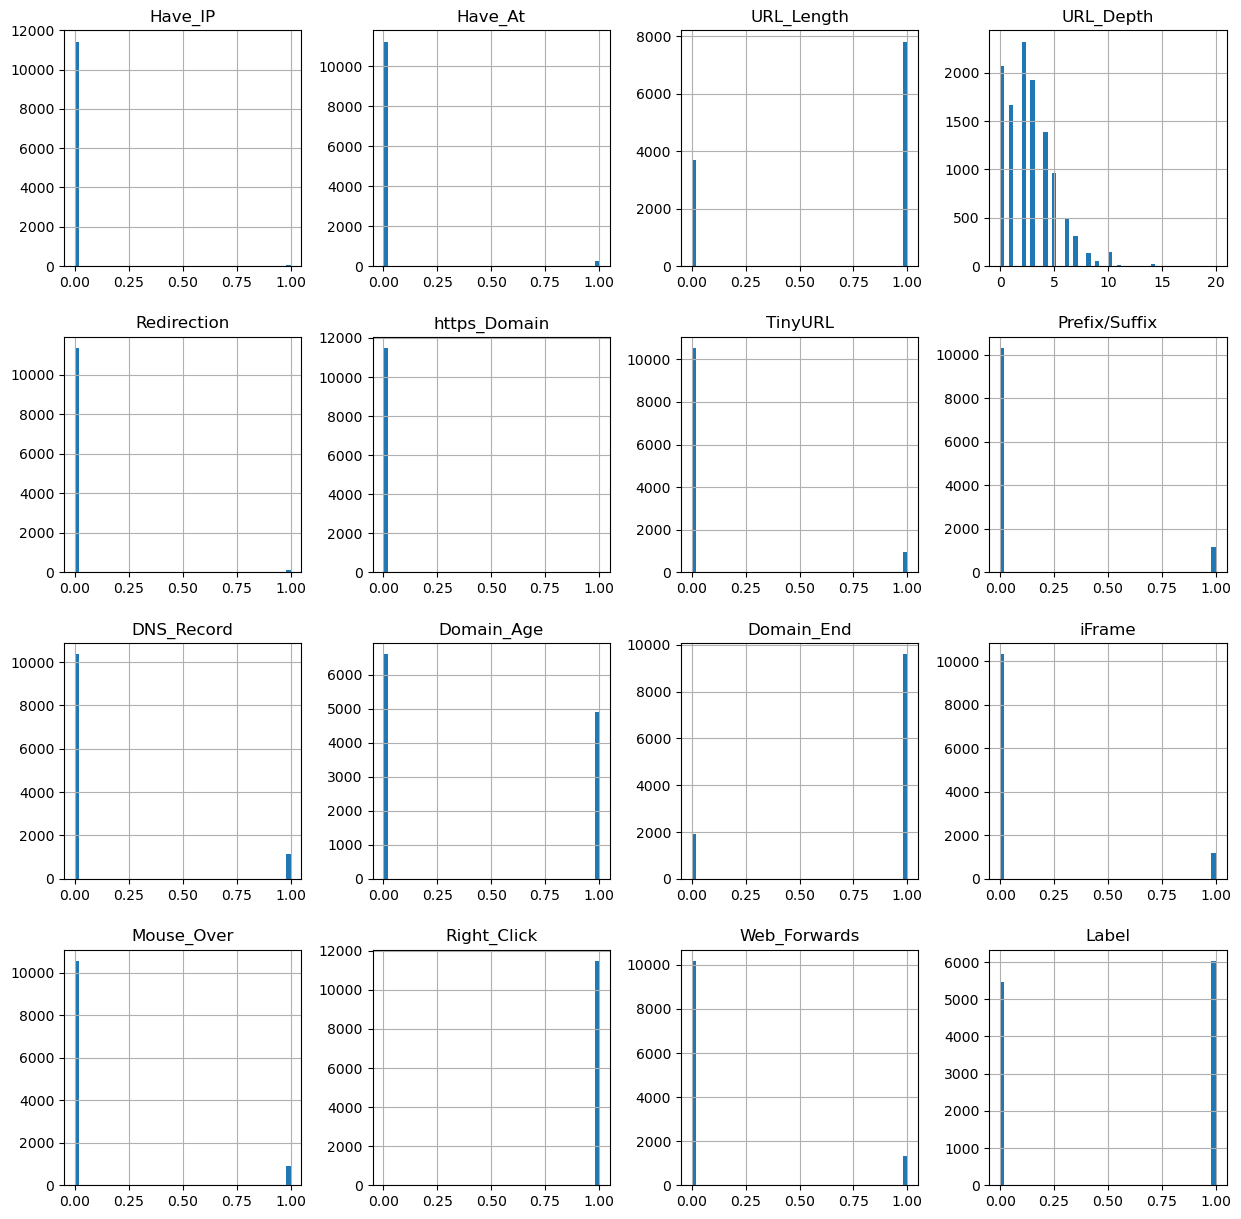

In [15]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

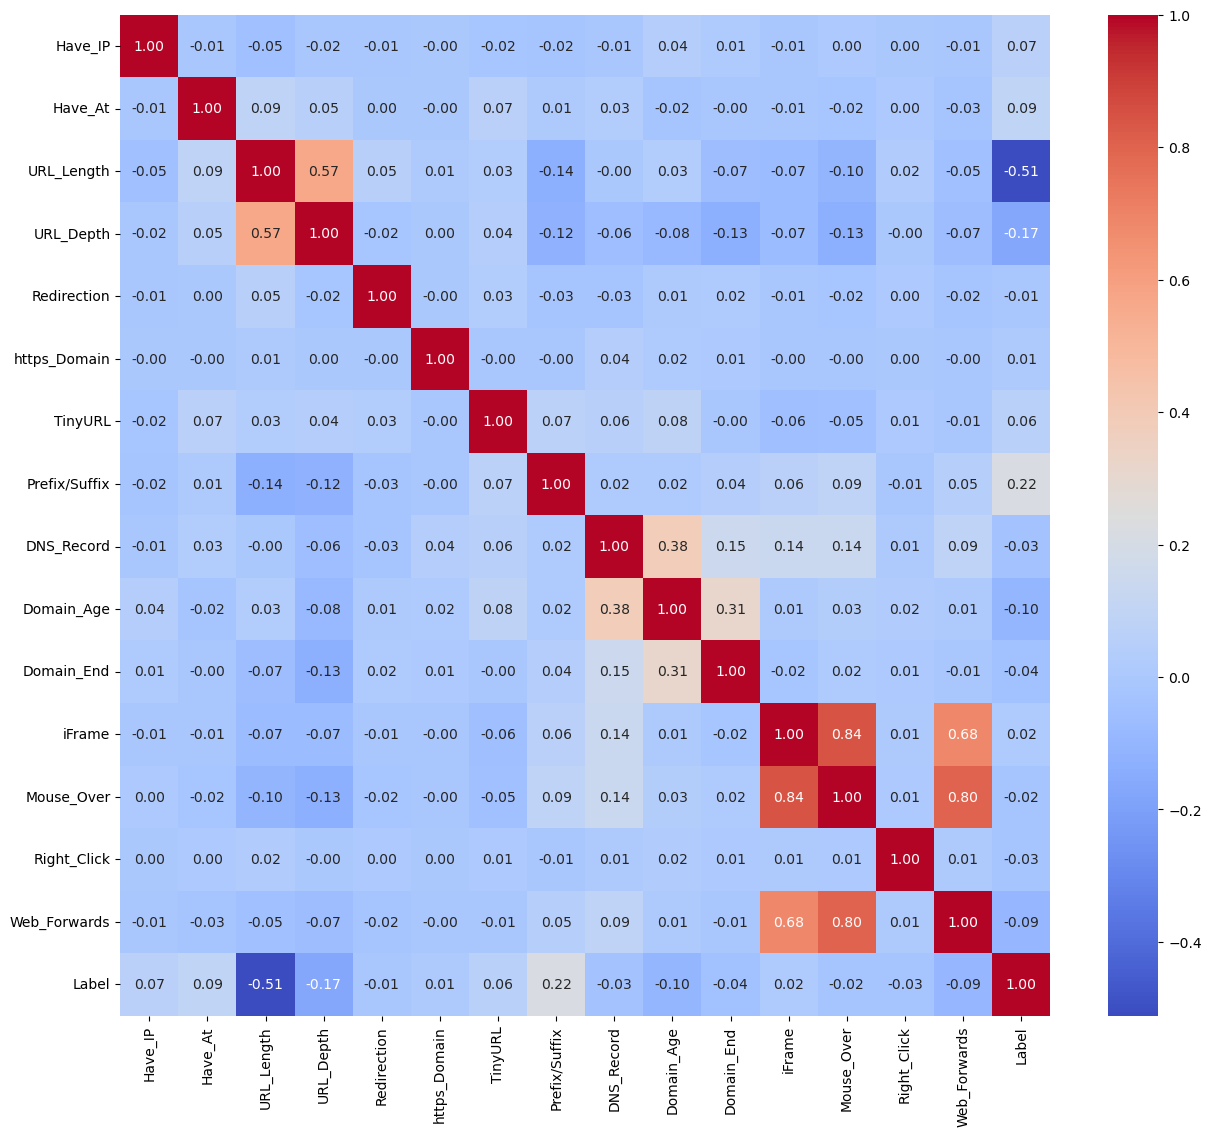

In [16]:
# Select only numeric columns
numeric_data = data0.select_dtypes(include=[float, int])

# Check if there are any numeric columns
if numeric_data.shape[1] == 0:
    raise ValueError("No numeric columns found in the dataset.")

# Correlation heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [17]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000
mean,0.004787,0.020541,0.680129,2.693533,0.012099,0.000174,0.083384,0.101924,0.098877,0.425712,0.834537,0.103055,0.079990,0.999304,0.113935,0.525111
std,0.069027,0.141849,0.466447,2.228658,0.109331,0.013193,0.276474,0.302561,0.298510,0.494472,0.371614,0.304044,0.271289,0.026380,0.317746,0.499391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [18]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [19]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [20]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,5,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,1,6,0,0,0,0,0,1,1,0,0,1,0,1
3,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [21]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((11489, 15), (11489,))

In [22]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9191, 15), (2298, 15))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook is:
* XGBoost


In [23]:
#importing packages
from sklearn.metrics import accuracy_score

In [24]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [26]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.1/99.8 MB 655.4 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 958.4 kB/s eta 0:01:44
   ---------------------------------------- 0.2/99.8 MB 942.1 kB/s eta 0:01:46
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/99.8 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.5/99.8 MB 1.2 MB/s eta 0:01:21
   --------------------------

In [27]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [29]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.844
XGBoost : Accuracy on test Data: 0.850


**Storing the results:**

In [30]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
from joblib import dump, load

# Save the trained model using joblib
model_file_path_joblib = 'xgboost_model_joblib.joblib'
dump(xgb, model_file_path_joblib)

print("Model saved using joblib.")
